In [61]:
import numpy as np  
import pandas as pd
from run_abc import RunABC
from dominance import IsDominated
import matplotlib.pyplot as plt  
  
# Load data from Excel file  
R = pd.read_excel('data.xlsx').values
assets = pd.read_excel('data.xlsx').columns
# Define parameters  
nAsset = R.shape[1]  
MinRet = np.mean(np.mean(R, axis=0))  
MaxRet = np.max(np.mean(R, axis=0))  
nSol = 10  
DR = np.linspace(MinRet, MaxRet, nSol)  
  
# Initialize variables  
W = np.zeros((nSol, nAsset))  
WReturn = np.zeros((nSol, 1))  
WRisk = np.zeros((nSol, 1))  
  
# Define the model  
model = {'R': R,'alpha': 0.95}  
  
# Run ABC algorithm  
for k in range(nSol):  
   model['DesiredRet'] = DR[k]  
   print(f'Running for Solution #{k+1}:')  
   out = RunABC(model)  
   print('__________________________')  
   print('')  
   W[k, :] = out['BestSol']['Out']['w']  
   WReturn[k] = out['BestSol']['Out']['ret']  
   WRisk[k] = out['BestSol']['Out']['rsk']  
  
# Find efficient frontier  
EF = np.where(~IsDominated(WRisk, WReturn))[0]  



Running for Solution #1:
Iteration 1: Best Cost = 0.011283116985654276
Iteration 2: Best Cost = 0.010934723547874097
Iteration 3: Best Cost = 0.010453373843427212
Iteration 4: Best Cost = 0.010453373843427212
Iteration 5: Best Cost = 0.010453373843427212
Iteration 6: Best Cost = 0.010347819203737302
Iteration 7: Best Cost = 0.010303917162738018
Iteration 8: Best Cost = 0.010303917162738018
Iteration 9: Best Cost = 0.010286402687160552
Iteration 10: Best Cost = 0.010177769917293139
Iteration 11: Best Cost = 0.010177769917293139
Iteration 12: Best Cost = 0.010177769917293139
Iteration 13: Best Cost = 0.0101232506259553
Iteration 14: Best Cost = 0.0101232506259553
Iteration 15: Best Cost = 0.0101232506259553
Iteration 16: Best Cost = 0.01010904880693142
Iteration 17: Best Cost = 0.01010904880693142
Iteration 18: Best Cost = 0.01004363287751104
Iteration 19: Best Cost = 0.01004363287751104
Iteration 20: Best Cost = 0.01004363287751104
Iteration 21: Best Cost = 0.01004363287751104
Iteration

Iteration 24: Best Cost = 0.011882418071021573
Iteration 25: Best Cost = 0.011867472837339726
Iteration 26: Best Cost = 0.011839578606454109
Iteration 27: Best Cost = 0.011839578606454109
Iteration 28: Best Cost = 0.011839578606454109
Iteration 29: Best Cost = 0.011839578606454109
Iteration 30: Best Cost = 0.011839578606454109
Iteration 31: Best Cost = 0.011812903324902074
Iteration 32: Best Cost = 0.011812903324902074
Iteration 33: Best Cost = 0.011812903324902074
Iteration 34: Best Cost = 0.011812903324902074
Iteration 35: Best Cost = 0.011812903324902074
Iteration 36: Best Cost = 0.011812903324902074
Iteration 37: Best Cost = 0.011812903324902074
Iteration 38: Best Cost = 0.011812903324902074
Iteration 39: Best Cost = 0.011954277843044524
Iteration 40: Best Cost = 0.011922523598076754
Iteration 41: Best Cost = 0.011922523598076754
Iteration 42: Best Cost = 0.011922523598076754
Iteration 43: Best Cost = 0.011922523598076754
Iteration 44: Best Cost = 0.011922523598076754
Iteration 45:

Iteration 47: Best Cost = 0.6044076923054007
Iteration 48: Best Cost = 0.6044076923054007
Iteration 49: Best Cost = 0.6044076923054007
Iteration 50: Best Cost = 0.6044076923054007
Iteration 51: Best Cost = 0.6044076923054007
Iteration 52: Best Cost = 0.6044076923054007
Iteration 53: Best Cost = 0.6044276205821646
Iteration 54: Best Cost = 0.6044276205821646
Iteration 55: Best Cost = 0.6044276205821646
Iteration 56: Best Cost = 0.6044276205821646
Iteration 57: Best Cost = 0.6046088515702811
Iteration 58: Best Cost = 0.6045501487799261
Iteration 59: Best Cost = 0.6049073271674077
Iteration 60: Best Cost = 0.6049073271674077
__________________________

Running for Solution #8:
Iteration 1: Best Cost = 1.1113013825035538
Iteration 2: Best Cost = 1.057767486653606
Iteration 3: Best Cost = 1.0534543704469819
Iteration 4: Best Cost = 1.0534543704469819
Iteration 5: Best Cost = 1.0251103695668722
Iteration 6: Best Cost = 0.9958530987308285
Iteration 7: Best Cost = 0.9958530987308285
Iteration 

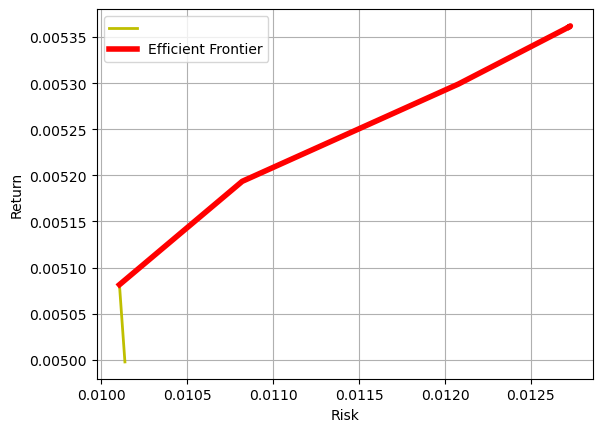

In [62]:
# Plot efficient frontier  
plt.figure()  
plt.plot(WRisk, WReturn, 'y', linewidth=2)  
plt.plot(WRisk[EF], WReturn[EF], 'r', linewidth=4)  
plt.legend(['', 'Efficient Frontier'])  
plt.xlabel('Risk')  
plt.ylabel('Return')  
plt.grid(True)  
plt.savefig('Efficient_Frontier.pdf', bbox_inches='tight')  
  

Risk is: [[0.01272256]]
Return is: [[0.00536128]]


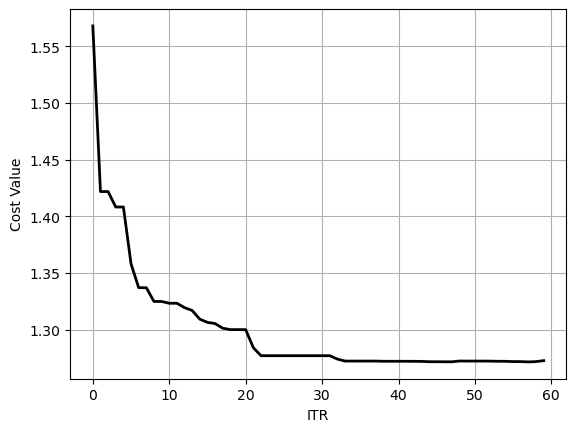

In [63]:
# Plot ITR cost  
plt.figure()  
plt.plot(out['BestCost'], 'k', linewidth=2)  
plt.xlabel('ITR')  
plt.ylabel('Cost Value')  
plt.grid(True)  
plt.savefig('ITR_Cost.pdf', bbox_inches='tight')  
  
# Print results  
print('Risk is:', abs(out['BestSol']['Out']['rsk']))  
print('Return is:', out['BestSol']['Out']['ret'])

In [65]:
# Print optimal weights
solution = list(zip(assets, out["BestSol"]["Out"]["w"][0]))
solution

[('CTA', np.float64(0.15006082097311635)),
 ('CA', np.float64(0.14891832325499554)),
 ('DS', np.float64(0.15006411136396575)),
 ('ELS', np.float64(0.14963888950973728)),
 ('EMN', np.float64(0.050041319438575635)),
 ('ED', np.float64(0.15007900461251153)),
 ('GM', np.float64(0.05005685559755734)),
 ('MA', np.float64(0.05102331282916856)),
 ('FIA', np.float64(0.05005047078158614)),
 ('CLS', np.float64(0.05006689163878586))]